### 목표 : 당뇨병 예측 모델 구현
- 데이터 : scikit - learn dataset
- feature: 10
- target : 정수값

1.  모듈 로딩, 데이터 준비

In [108]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [109]:
## 데이터 로딩
diabetes=pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
featureDF, targetDF = load_diabetes(return_X_y=True, as_frame=True)

In [110]:
diabetes

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [111]:
featureDF.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [112]:
targetDF

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## 데이터 전처리
- 결측치 : 없음
- 이상치 : boxplot 그려보기
- 중복값 : 

### 데이터셋 준비: 피처, 타겟 분리 
target = Y
 feature = BMI, S5

In [113]:
corr= diabetes.corr(numeric_only=True)
abs(corr['Y']).sort_values(ascending=False).head(3)

Y      1.000000
BMI    0.586450
S5     0.565883
Name: Y, dtype: float64

In [114]:
# 사용할 데이터 뽑아내기
# target = Y
# feature = BMI, S5

featureDF =diabetes[['BMI', 'S5']]
featureDF.head()

,BMI,S5
0,32.1,4.8598
1,21.6,3.8918
2,30.5,4.6728
3,25.3,4.8903
4,23.0,4.2905


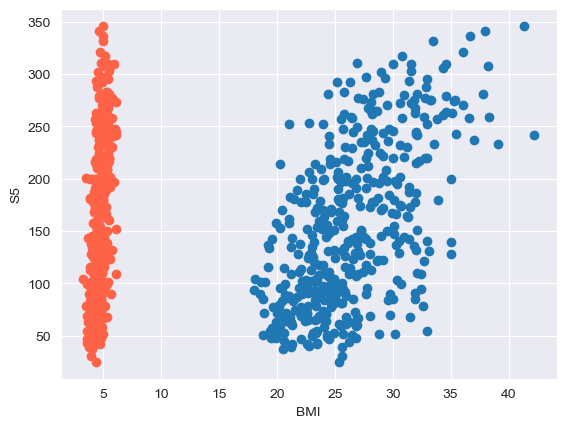

In [121]:
#feature(BMI, S5) 시각화

plt.scatter(featureDF.BMI, targetDF)
plt.scatter(featureDF.S5, targetDF, c='tomato')
plt.xlabel("BMI")
plt.ylabel("S5")
plt.show()

# 학습 / 테스트 데이터셋 분리
- 지도학습 중 분류 : 타깃 비율 고려
- 학습 : 테스트 = 8:2

In [123]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, random_state=42)

In [125]:
# 데이터셋 확인
print(f'학습용 데이터셋 확인: \n{x_train} , {y_train}')
print(f' 테스트 데이터셋 확인: \n {x_test.head()}, {y_test.head()}')

학습용 데이터셋 확인: 
      BMI      S5
17   27.5  4.9416
66   24.7  4.6444
137  31.0  4.8283
245  23.1  4.0943
31   20.3  4.2341
..    ...     ...
106  19.3  3.9890
270  29.2  4.7362
348  24.5  4.5218
435  24.2  4.2195
102  29.0  4.5850

[353 rows x 2 columns] , 17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
       ...  
106    134.0
270    202.0
348    148.0
435     64.0
102    302.0
Name: target, Length: 353, dtype: float64
 테스트 데이터셋 확인: 
       BMI      S5
287  25.8  4.9972
211  29.8  4.3944
72   26.0  5.5683
321  31.2  5.7236
73   24.5  4.5850, 287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64


## feature dataset scale

In [126]:
# 스케일러 인스턴스 생성하기
scaler = StandardScaler()

In [127]:
scaler.fit(x_train)

StandardScaler()

In [130]:
# 학습용 데이터 피처 스케일링
scaled_xtrain = scaler.transform(x_train)
transformed_xtrain = scaler.transform(x_train)
transformed_xtrain.shape

(353, 2)

In [131]:
# 테스트용 데이터 피처 스케일링
scaled_xtest = scaler.transform(x_test)
scaled_xtest.shape

(89, 2)

# 모델 생성


In [132]:
model = KNeighborsRegressor()
model

KNeighborsRegressor()

In [133]:
model.fit(scaled_xtrain, y_train)

KNeighborsRegressor()

In [134]:
model.score(scaled_xtrain, y_train)

0.5832567608380785

In [135]:
model.fit(scaled_xtest,y_test)

KNeighborsRegressor()

In [136]:
model.score(scaled_xtest, y_test)

0.5605851149460073

## 성능평가

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(featureDF) #예측값 계산하기
y_pred = np.round(y_pred)

#MSE
print(f'1. MSE: {mean_squared_error(y_test, y_pred)}')
print(f'2. MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'3. R2: {r2_score(y_test, y_pred)}')
print(f'4.RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [89, 442]